# IDR2 Delay Filtered Data Analysis

### Shane Bechtel & Tyler Cox

When imaging delay filtered IDR2 data, it was noted that the average visibility was much higher in images created using the full spectral range than images created using channels 100-800. Ideally when using the technique of delay filtering, all foregrounds should be removed. However, we are still seeing a visibility dependence on the foregrounds especially when using the full spectral range. This notebook is used to analyze the delay filtered IDR2 data to understand why we are seeing an increase in visibilites when using the entire spectral range. We start by importing the necessary libraries and selecting our plot settings.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
from matplotlib.colors import SymLogNorm
import os
import glob
from astropy.io import fits
from astropy.wcs import WCS
from astropy.time import Time
from HERA_calibration_sources import add_fluxes

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

In [49]:
uv = UVData()
uv.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.37009.uvOCRSDL.uvfits')

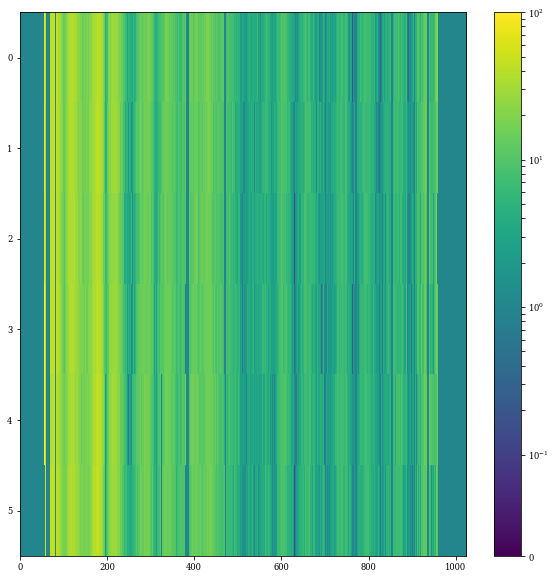

In [3]:
data = uv.get_data(11,12,'xx')

plt.figure(figsize = (10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=100,linthresh=.1))
plt.colorbar()
plt.show()

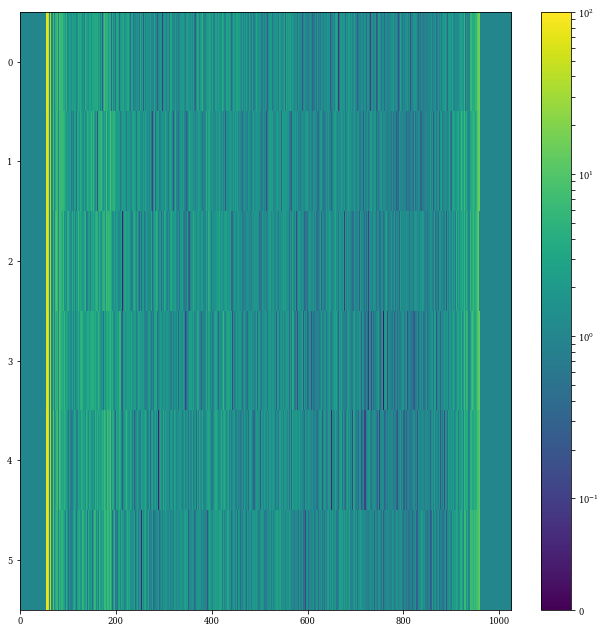

In [4]:
data = uv.get_data(11,41,'xx')

plt.figure(figsize=(11,11))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=100,linthresh=.1))
plt.colorbar()
plt.show()

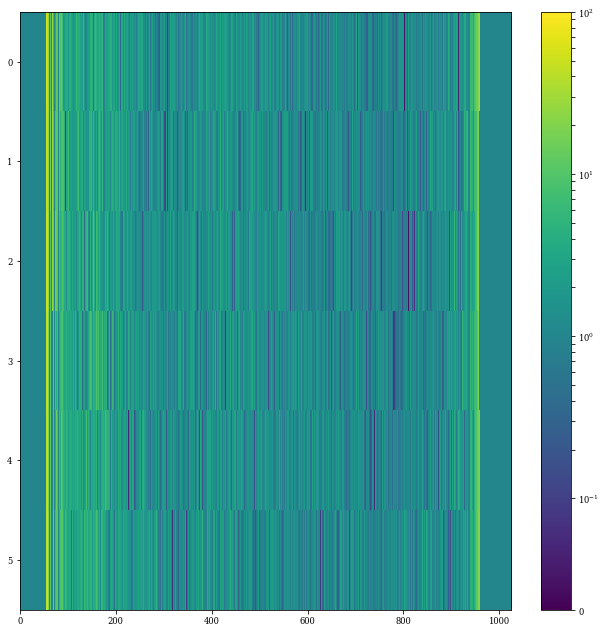

In [5]:
data = uv.get_data(1,143,'xx')

plt.figure(figsize=(11,11))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=100,linthresh=.1))
plt.colorbar()
plt.show()

In [6]:
np.where(data == data[0][800:].max())

(array([0]), array([956]))

In [7]:
np.where(data == data.max())

(array([1]), array([63]))

In [8]:
data[0][100:800].max()

(6.250037+2.9880438j)

In [9]:
data[0][:].max()

(9.888119+6.3828273j)

In [52]:
uv_filtered = UVData()
uv = UVData()
folders = np.sort(glob.glob('/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/*uvfits'))
folders_nf = np.sort(glob.glob('/data6/HERA/data/IDR2.1/uvOCRSL_time_split_data/*uvfits'))
create_arr = True

ant_pair_1 = (11,12)
ant_pair_2 = (11,41)
ant_pair_3 = (1,143)

for folder, folder_nf in zip(folders,folders_nf):
    print folder
    uv_filtered.read_uvfits(folder, ant_pairs_nums=[ant_pair_1,ant_pair_2,ant_pair_3])
    uv.read_uvfits(folder_nf,ant_pairs_nums=[ant_pair_1,ant_pair_2,ant_pair_3])
    if create_arr:
        short_base = uv_filtered.get_data(11,12,'xx')
        mid_base = uv_filtered.get_data(11,41,'xx')
        long_base = uv_filtered.get_data(1,143,'xx')
        short_base_nf = uv.get_data(11,12,'xx')
        mid_base_nf = uv.get_data(11,41,'xx')
        long_base_nf = uv.get_data(1,143,'xx')
        short_base_time = uv_filtered.get_times(11,12)
        mid_base_time = uv_filtered.get_times(11,41)
        long_base_time = uv_filtered.get_times(1,143)
        create_arr = False
    else:
        short_base = np.vstack([short_base,uv_filtered.get_data(11,12,'xx')])
        mid_base = np.vstack([mid_base,uv_filtered.get_data(11,41,'xx')])
        long_base = np.vstack([long_base,uv_filtered.get_data(1,143,'xx')])
        short_base_nf = np.vstack([short_base_nf,uv.get_data(11,12,'xx')])
        mid_base_nf = np.vstack([mid_base_nf,uv.get_data(11,41,'xx')])
        long_base_nf = np.vstack([long_base_nf,uv.get_data(1,143,'xx')])
        short_base_time = np.hstack((short_base_time,uv_filtered.get_times(11,12)))
        mid_base_time = np.hstack((mid_base_time, uv_filtered.get_times(11,41)))
        long_base_time = np.hstack((long_base_time,uv_filtered.get_times(1,143)))


/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.28210.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.28359.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.28508.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.28658.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.28807.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.28956.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.29105.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.29254.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.29403.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.29552.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.29702.uvOCRSDL.uvfits

/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.41781.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.41930.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.42079.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.42229.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.42378.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.42527.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.42676.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.42825.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.42974.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.43123.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.43272.uvOCRSDL.uvfits

/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.55352.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.55501.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.55650.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.55799.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.55949.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.56098.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.56247.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.56396.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.56545.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.56694.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.56843.uvOCRSDL.uvfits

/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.68923.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.69072.uvOCRSDL.uvfits
/data6/HERA/data/IDR2.1/uvOCRSDL_time_split_data/zen.grp1.of1.xx.LST.69221.uvOCRSDL.uvfits


In [53]:
short_base_time = np.round(short_base_time,5)
mid_base_time = np.round(mid_base_time,5)
long_base_time = np.round(long_base_time,5)

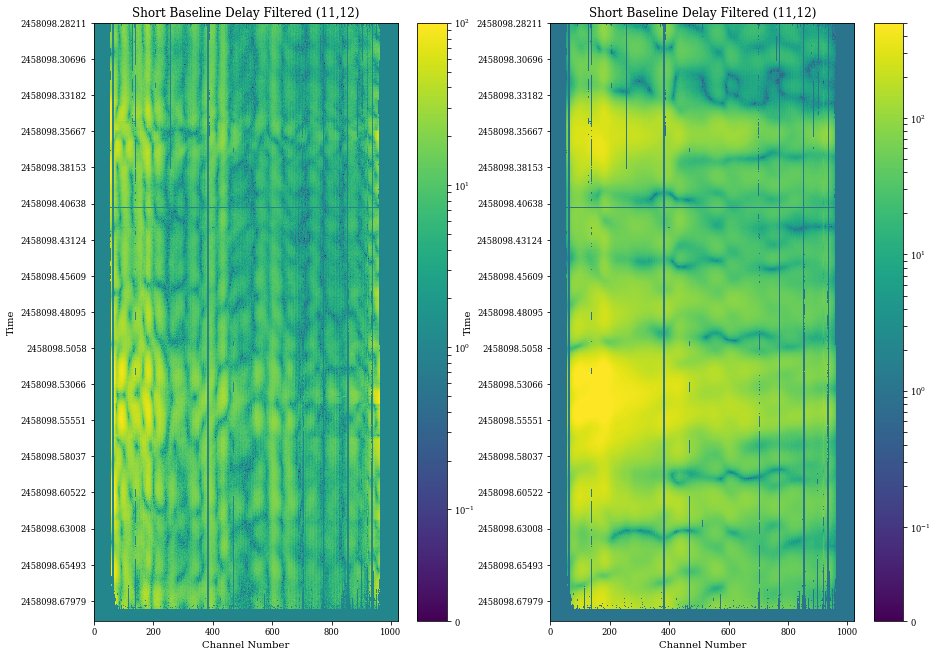

In [58]:
plt.figure(figsize=(15,11))

plt.subplot(1,2,1)

plt.imshow(np.abs(short_base), aspect='auto', norm=SymLogNorm(vmin=0,vmax=100,linthresh=.1))
plt.title('Short Baseline Delay Filtered (11,12)')
plt.xlabel('Channel Number')
plt.ylabel('Time')
plt.yticks(np.arange(0,short_base_time.shape[0],100),short_base_time[::100])
plt.colorbar()

plt.subplot(1,2,2)

plt.imshow(np.abs(short_base_nf), aspect='auto', norm=SymLogNorm(vmin=0,vmax=500,linthresh=.1))
plt.title('Short Baseline Delay Filtered (11,12)')
plt.xlabel('Channel Number')
plt.ylabel('Time')
plt.yticks(np.arange(0,short_base_time.shape[0],100),short_base_time[::100])
plt.colorbar()

plt.show()

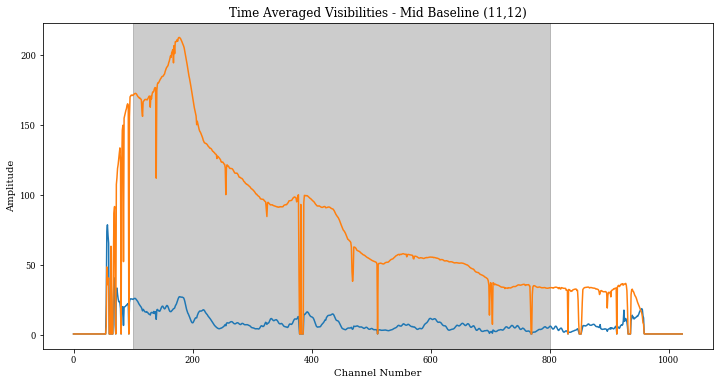

In [59]:
time_avg_short = np.mean(np.abs(short_base),axis=0)
time_avg_short_nf = np.mean(np.abs(short_base_nf),axis=0)


fig, ax = plt.subplots(figsize=(12,6))
ax.axvspan(100, 800, alpha=0.2, color='black')
ax.plot(np.arange(time_avg_short.shape[0]), time_avg_short)
plt.title('Time Averaged Visibilities - Mid Baseline (11,12)')
plt.xlabel('Channel Number')
plt.ylabel('Amplitude')

ax.plot(np.arange(time_avg_short.shape[0]), time_avg_short_nf)
plt.title('Time Averaged Visibilities - Mid Baseline (11,12)')
plt.xlabel('Channel Number')
plt.ylabel('Amplitude')
plt.show()

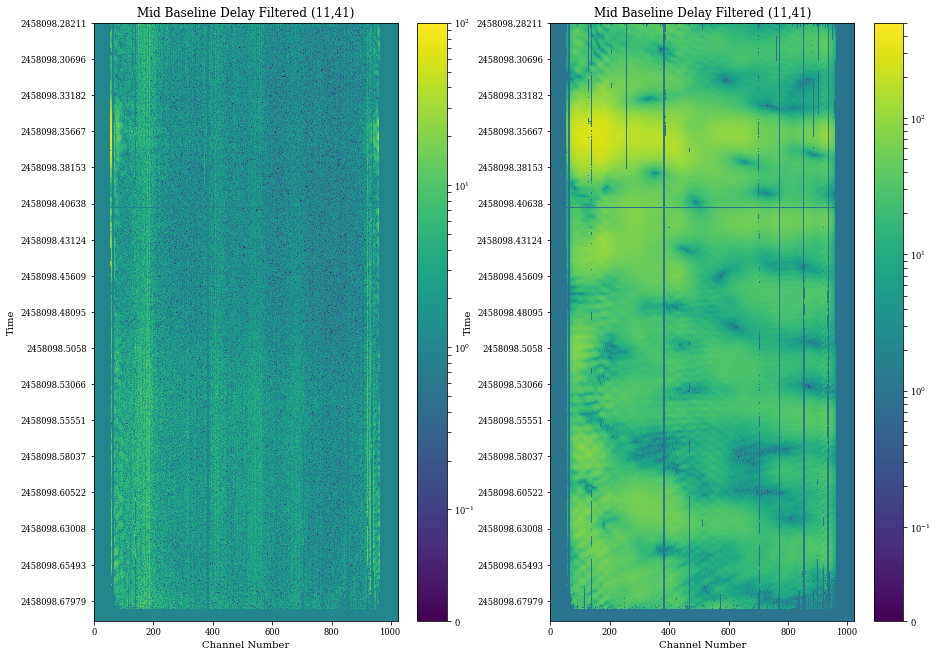

In [60]:
plt.figure(figsize=(15,11))

plt.subplot(1,2,1)

plt.imshow(np.abs(mid_base), aspect='auto', norm=SymLogNorm(vmin=0,vmax=100,linthresh=.1))
plt.title('Mid Baseline Delay Filtered (11,41)')
plt.xlabel('Channel Number')
plt.ylabel('Time')
plt.yticks(np.arange(0,mid_base_time.shape[0],100),mid_base_time[::100])
plt.colorbar()

plt.subplot(1,2,2)

plt.imshow(np.abs(mid_base_nf), aspect='auto', norm=SymLogNorm(vmin=0,vmax=500,linthresh=.1))
plt.title('Mid Baseline Delay Filtered (11,41)')
plt.xlabel('Channel Number')
plt.ylabel('Time')
plt.yticks(np.arange(0,mid_base_time.shape[0],100),mid_base_time[::100])
plt.colorbar()

plt.show()

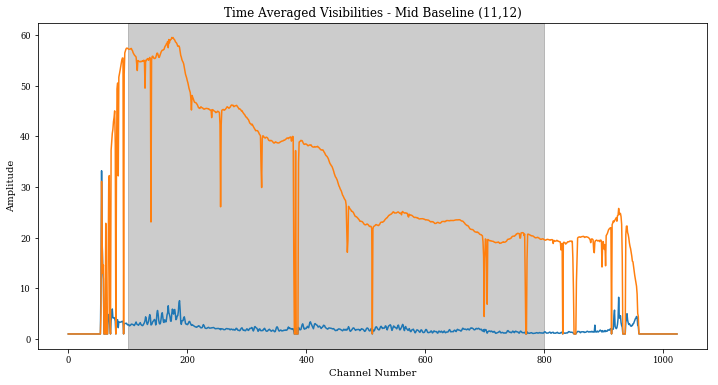

In [61]:
time_avg_mid = np.mean(np.abs(mid_base),axis=0)
time_avg_mid_nf = np.mean(np.abs(mid_base_nf),axis=0)


fig, ax = plt.subplots(figsize=(12,6))
ax.axvspan(100, 800, alpha=0.2, color='black')
ax.plot(np.arange(time_avg_mid.shape[0]), time_avg_mid)
plt.title('Time Averaged Visibilities - Mid Baseline (11,41)')
plt.xlabel('Channel Number')
plt.ylabel('Amplitude')

ax.plot(np.arange(time_avg_mid.shape[0]), time_avg_mid_nf)
plt.title('Time Averaged Visibilities - Mid Baseline (11,12)')
plt.xlabel('Channel Number')
plt.ylabel('Amplitude')

plt.show()

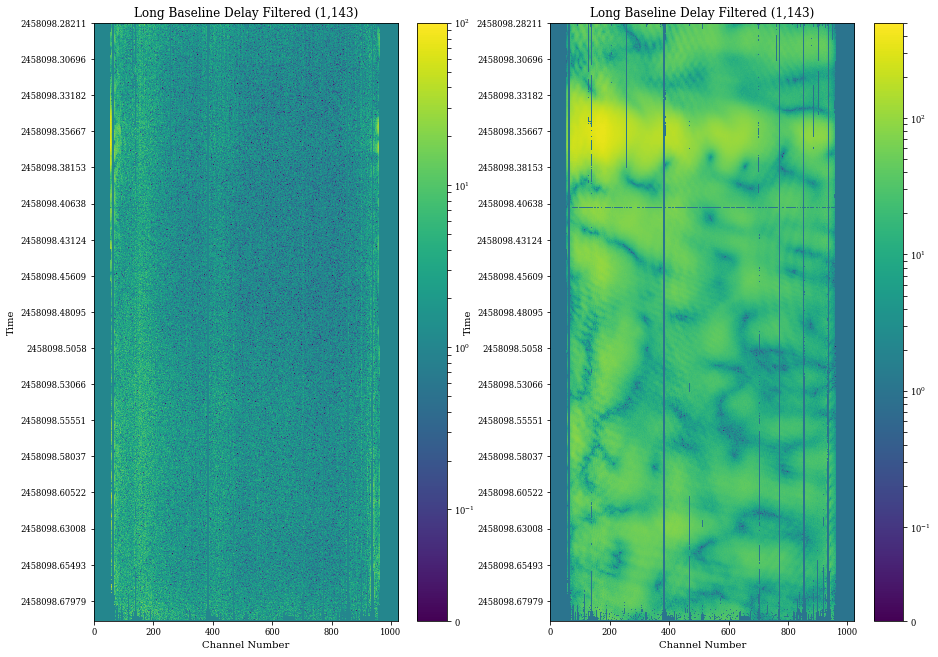

In [63]:
plt.figure(figsize=(15,11))

plt.subplot(1,2,1)

plt.imshow(np.abs(long_base), aspect='auto', norm=SymLogNorm(vmin=0,vmax=100,linthresh=.1))
plt.colorbar()
plt.title('Long Baseline Delay Filtered (1,143)')
plt.xlabel('Channel Number')
plt.ylabel('Time')
plt.yticks(np.arange(0,long_base_time.shape[0],100),long_base_time[::100])

plt.subplot(1,2,2)

plt.imshow(np.abs(long_base_nf), aspect='auto', norm=SymLogNorm(vmin=0,vmax=500,linthresh=.1))
plt.colorbar()
plt.title('Long Baseline Delay Filtered (1,143)')
plt.xlabel('Channel Number')
plt.ylabel('Time')
plt.yticks(np.arange(0,long_base_time.shape[0],100),long_base_time[::100])

plt.show()

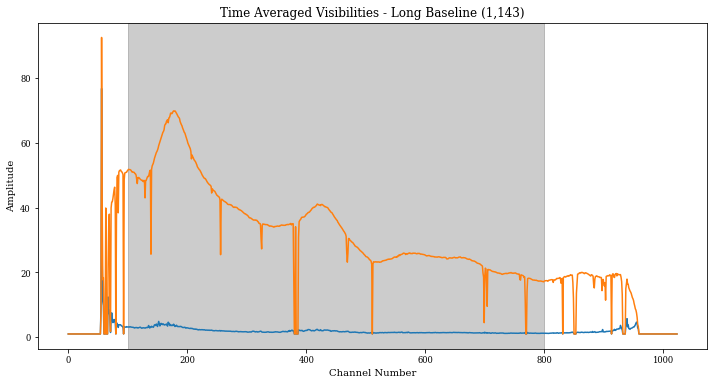

In [64]:
time_avg_long = np.mean(np.abs(long_base),axis=0)
time_avg_long_nf = np.mean(np.abs(long_base_nf),axis=0)

fig, ax = plt.subplots(figsize=(12,6))

ax.axvspan(100, 800, alpha=0.2, color='black')
ax.plot(np.arange(time_avg_long.shape[0]), time_avg_long)
plt.title('Time Averaged Visibilities - Long Baseline (1,143)')
plt.xlabel('Channel Number')
plt.ylabel('Amplitude')

ax.plot(np.arange(time_avg_long_nf.shape[0]), time_avg_long_nf)
plt.title('Time Averaged Visibilities - Long Baseline (1,143)')
plt.xlabel('Channel Number')
plt.ylabel('Amplitude')

plt.show()

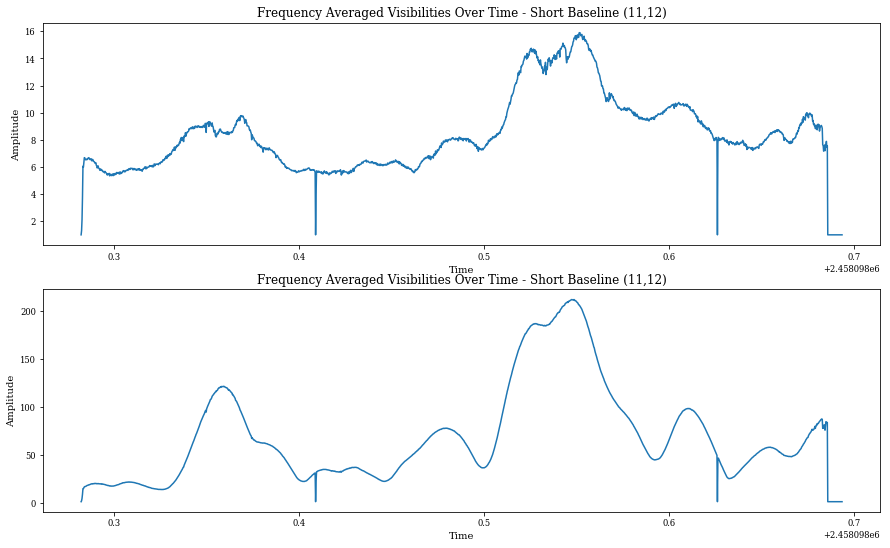

In [77]:
freq_avg_short = np.mean(np.abs(short_base),axis=1)
freq_avg_short_nf = np.mean(np.abs(short_base_nf),axis=1)

plt.figure(figsize=(15,9))

plt.subplot(2,1,1)

plt.plot(short_base_time,freq_avg_short)
#plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Delay Filtered Frequency Averaged Visibilities Over Time - Short Baseline (11,12)')

plt.subplot(2,1,2)

plt.plot(short_base_time,freq_avg_short_nf)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Frequency Averaged Visibilities Over Time - Short Baseline (11,12)')

plt.show()

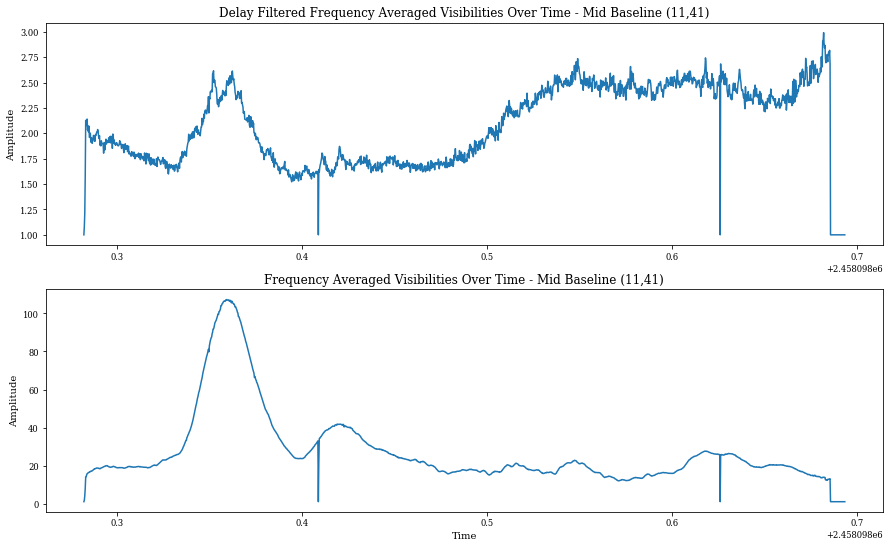

In [92]:
freq_avg_mid = np.mean(np.abs(mid_base),axis=1)
freq_avg_mid_nf = np.mean(np.abs(mid_base_nf),axis=1)

plt.figure(figsize=(15,9))

plt.subplot(2,1,1)

plt.plot(mid_base_time,freq_avg_mid)
#plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Delay Filtered Frequency Averaged Visibilities Over Time - Mid Baseline (11,41)')

plt.subplot(2,1,2)

plt.plot(mid_base_time,freq_avg_mid_nf)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Frequency Averaged Visibilities Over Time - Mid Baseline (11,41)')

plt.show()

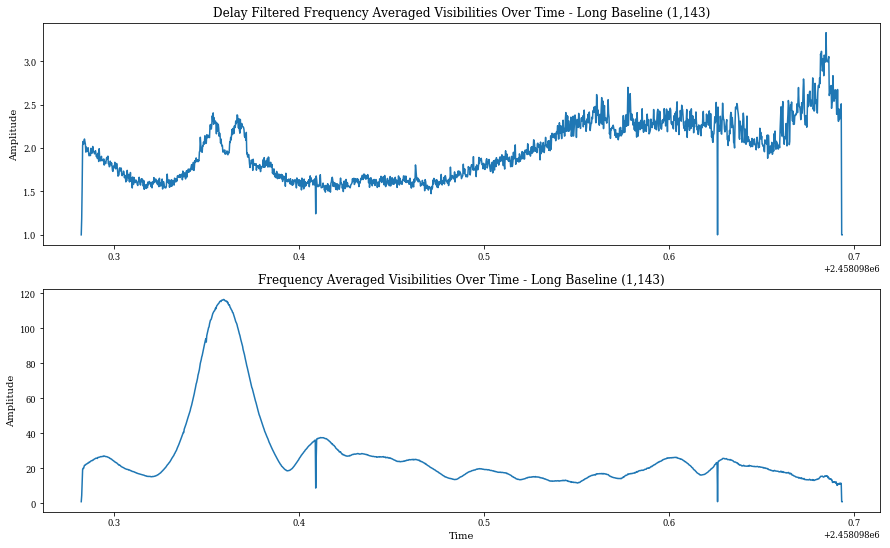

In [91]:
freq_avg_long = np.mean(np.abs(long_base),axis=1)
freq_avg_long_nf = np.mean(np.abs(long_base_nf),axis=1)


plt.figure(figsize=(15,9))

plt.subplot(2,1,1)

plt.plot(long_base_time, freq_avg_long)
#plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Delay Filtered Frequency Averaged Visibilities Over Time - Long Baseline (1,143)')

plt.subplot(2,1,2)

plt.plot(long_base_time, freq_avg_long_nf)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Frequency Averaged Visibilities Over Time - Long Baseline (1,143)')

plt.show()

In [41]:
files = np.sort(glob.glob('/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/*fits'))
HDUS = []
for f in files:
    HDUS.append(fits.open(f))

In [42]:
tb = add_fluxes(RA_range=('00:00:00','24:00:00'),dec_range=10, min_flux=10)


Right ascension:
	Lower: 00h00m00s 
	Upper: 24h00m00s
Declination:
	Lower: -40.7214 degrees
	Upper: -20.7214 degrees
Minimum flux: 10 Jy
Number of regions found: 52

              Name of Center          RA        Dec  Total flux in region
0   TGSSADR J235700.8-344535  359.253632 -34.759880          25352.699200
1   TGSSADR J002430.1-292848    6.125430 -29.480061          20084.700779
2   TGSSADR J015036.0-293202   27.650009 -29.533970          19413.999939
3   TGSSADR J020012.1-305327   30.050440 -30.891060          25311.699249
4   TGSSADR J034630.8-342238   56.628738 -34.377399          20649.199821
5   TGSSADR J035135.7-274435   57.898979 -27.743059          34203.899124
6   TGSSADR J042940.1-363053   67.417480 -36.514809          21454.000000
7   TGSSADR J044437.6-280950   71.156670 -28.163950          54120.298416
8   TGSSADR J045826.4-300720   74.610413 -30.122379          19984.100246
9   TGSSADR J045514.2-300650   73.809464 -30.113991          23645.400387
10  TGSSADR J052257

In [43]:
plot_data = {v['Name of Center']: {'RA_diff': [], 'Flux': [], 'time': [],'Pixel_x': [],'Pixel_y': []} for _,v in tb.iterrows()}
source_info = {v['Name of Center']: {'RA': v['RA'], 'DEC': v['Dec'], 
                                     'Total_Flux': v['Total flux in region']} 
                                     for _,v in tb.iterrows()}


In [44]:
err = 3

f_count = len(files)

c_prev = 0

for HDU,f in zip(HDUS,files):
    print ('Processing: ', f)
    # Read in file information
    fits_info = HDU[0].header
    ax1        = fits_info['NAXIS1']
    ax2        = fits_info['NAXIS2']
    units      = fits_info['BUNIT']
    c_ra       = fits_info['OBSRA']
    c_dec      = fits_info['OBSDEC']
    pix_size   = fits_info['CDELT2']
    c_pix1     = fits_info['CRPIX1']
    c_pix2     = fits_info['CRPIX2']  
    t          = fits_info['DATE-OBS']
    t          = float(Time(t).jd)
    
    data = HDU[0].data
    data = np.flip(data[0][0],axis=0)
    
    w = WCS(f)
    l_bound = w.all_pix2world(c_pix1,0,0,0,0)[0]
    r_bound = w.all_pix2world(c_pix1,ax2,0,0,0)[0]
    

    for _,src in tb.iterrows():
        # Convert a position to pixel values
        i,j = w.all_world2pix(src['RA'],src['Dec'],0,0,0)[:2]
        try:
            i = int(i)
            j = int(ax2-j)
        except:
            pass
        
        if (ax1-err > i > err) and (ax2-err > j > err):
            plot_data[src['Name of Center']]['Flux'].append(np.abs(data[j-err:j+err,i-err:i+err].max()))
            ra_diff = c_ra-src['RA']
            
            # Correct for the difference in c_ra error
            if ra_diff > 30:
                ra_diff -= 360
            if ra_diff < -30:
                ra_diff += 360
      
            plot_data[src['Name of Center']]['RA_diff'].append(ra_diff)
            plot_data[src['Name of Center']]['time'].append(t)
            plot_data[src['Name of Center']]['Pixel_x'].append(j)
            plot_data[src['Name of Center']]['Pixel_y'].append(i)
    c_prev = c_ra

('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.28211.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.28360.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.28509.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.28658.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.28807.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.28956.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.29105.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imagin

('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.37159.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.37308.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.37457.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.37606.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.37755.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.37904.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.38053.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imagin

('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.46106.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.46256.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.46405.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.46554.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.46703.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.46852.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.47001.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imagin

('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.55054.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.55203.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.55353.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.55502.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.55651.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.55800.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.55949.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imagin

('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.64300.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.64449.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.64599.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.64748.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.64897.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.65046.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.65195.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imagin

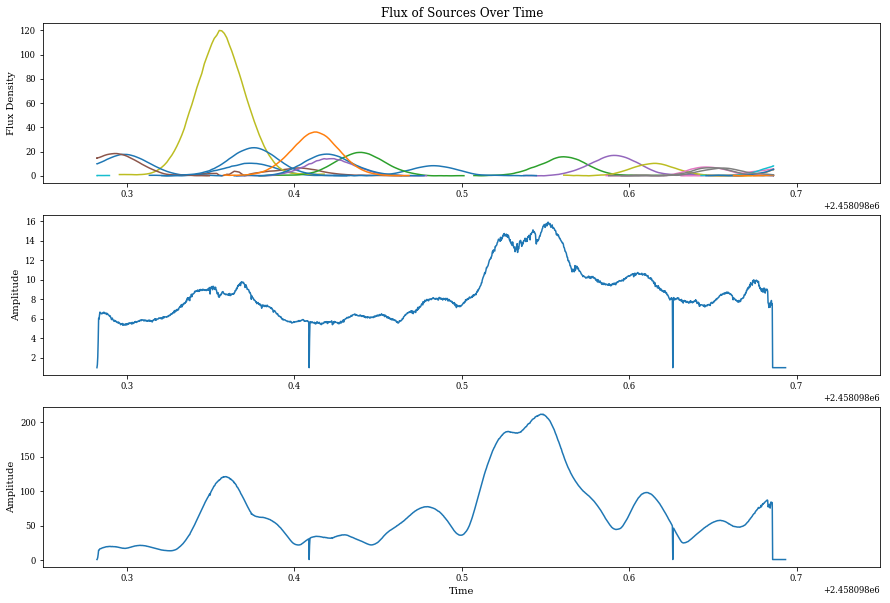

In [87]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)

for key,item in plot_data.items():
    theta = item['time']
    flux = np.array(item['Flux'])
    #plt.xlabel(r'Julian Date')
    plt.ylabel('Flux Density')
    plt.plot(theta,flux)
plt.title('Flux of Sources Over Time')
plt.xlim(2458098.25,2458098.75)

plt.subplot(3,1,2)

plt.plot(short_base_time,freq_avg_short)
#plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.title('Frequency Averaged Visibilities Over Time - Short Baseline (11,12)')
plt.xlim(2458098.25,2458098.75)

plt.subplot(3,1,3)

plt.plot(short_base_time,freq_avg_short_nf)
plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.title('Frequency Averaged Visibilities Over Time - Short Baseline (11,12)')
plt.xlim(2458098.25,2458098.75)

plt.show()

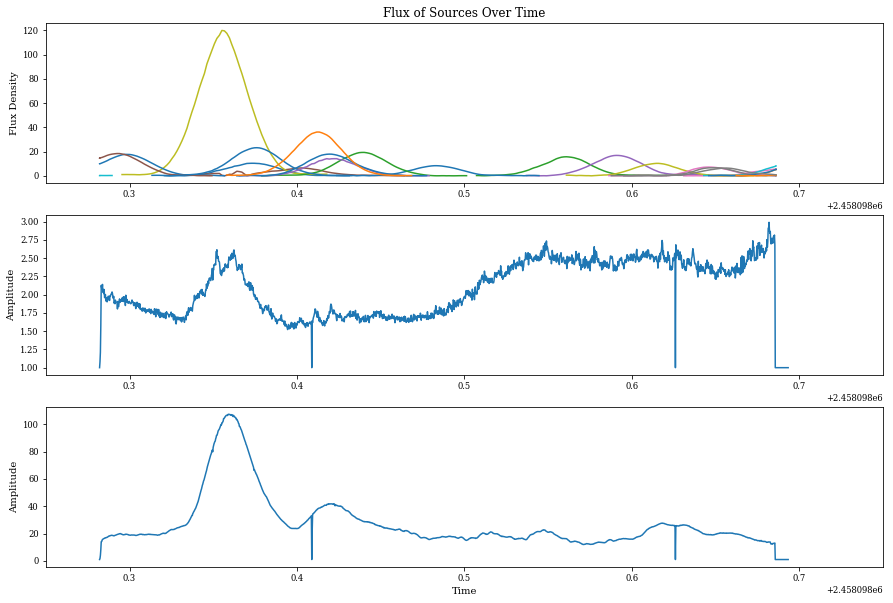

In [88]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)

for key,item in plot_data.items():
    theta = item['time']
    flux = np.array(item['Flux'])
    #plt.xlabel(r'Julian Date')
    plt.ylabel('Flux Density')
    plt.plot(theta,flux)
plt.title('Flux of Sources Over Time')
plt.xlim(2458098.25,2458098.75)

plt.subplot(3,1,2)

plt.plot(mid_base_time,freq_avg_mid)
#plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.title('Frequency Averaged Visibilities Over Time - Mid Baseline (11,41)')
plt.xlim(2458098.25,2458098.75)

plt.subplot(3,1,3)

plt.plot(mid_base_time,freq_avg_mid_nf)
plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.title('Frequency Averaged Visibilities Over Time - Mid Baseline (11,41)')
plt.xlim(2458098.25,2458098.75)

plt.show()

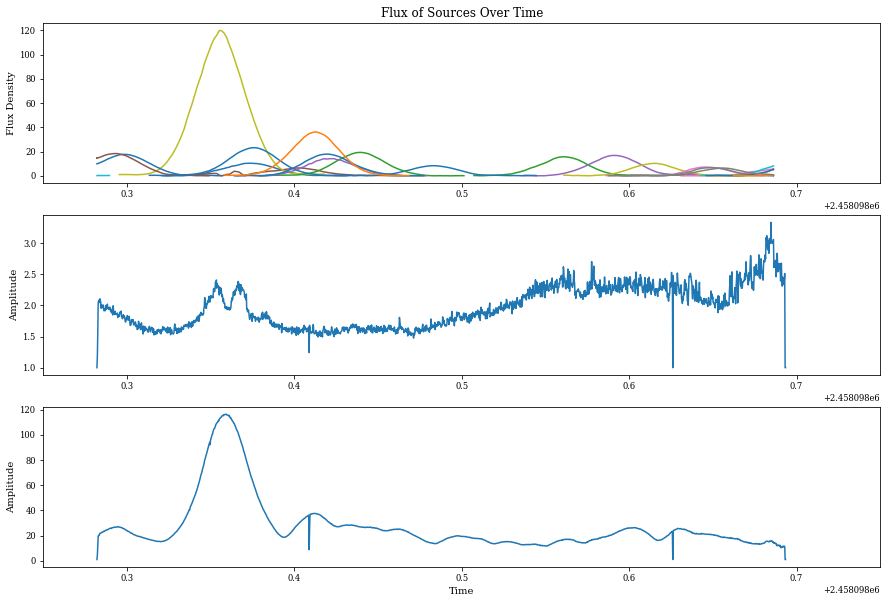

In [85]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)

for key,item in plot_data.items():
    theta = item['time']
    flux = np.array(item['Flux'])
    #plt.xlabel(r'Julian Date')
    plt.ylabel('Flux Density')
    plt.plot(theta,flux)
plt.title('Flux of Sources Over Time')
plt.xlim(2458098.25,2458098.75)

plt.subplot(3,1,2)

plt.plot(long_base_time,freq_avg_long)
#plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.title('Frequency Averaged Visibilities Over Time - Long Baseline (1,143)')
plt.xlim(2458098.25,2458098.75)

plt.subplot(3,1,3)

plt.plot(long_base_time,freq_avg_long_nf)
plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.title('Frequency Averaged Visibilities Over Time - Long Baseline (1,143)')
plt.xlim(2458098.25,2458098.75)

plt.show()

In [1]:
delay_spec = np.mean(np.fft.fftn(short_base_nf,axis=1)**2,axis=0)
plt.plot(np.arange(delay_spec.shape[0]),delay_spec)

plt.show()

NameError: name 'np' is not defined

In [3]:
uv = UVData()
uv.read_miriad('/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.1.28828.uvOCRSL/')

antenna_diameters is not set. Using known values for HERA.


array([  0,   0,   0, ..., 142, 142, 143])

In [21]:
uv.ant_1_array.shape[0]/np.unique(uv.ant_1_array).shape[0]**2

30

In [9]:
uv.ant_1_array.shape

(82680,)

In [28]:
np.diff(uv.freq_array)

array([[97656.25, 97656.25, 97656.25, ..., 97656.25, 97656.25, 97656.25]])

In [31]:
uv.freq_array[0,-1]-uv.freq_array[0,0]

99902343.75

(1, 1024)

In [3]:
import glob
import numpy as np

In [5]:
files = np.array(glob.glob('/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.*.uvOCRSDL/'))
files.sort()

In [6]:
files

array(['/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.0.06682.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.0.16078.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.0.25474.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.0.34870.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.0.44266.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.0.53661.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.0.63057.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.0.72453.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.0.81849.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.0.91245.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.1.00641.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.1.10036.uvOCRSDL/',
       '/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.